## 로지스틱 회귀

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [21]:
iris.data[-5:]

array([[6.7, 3. , 5.2, 2.3],
       [6.3, 2.5, 5. , 1.9],
       [6.5, 3. , 5.2, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]])

In [18]:
print(iris.data[:, 3:].shape, iris.data[:, 3].shape)

(150, 1) (150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [19]:
X = iris.data[:, 3:] # 특성 : petal width (cm) 1가지 특성만 사용하기
y = (iris.target == 2).astype(np.int32)  # 정답 : viriginica 인지(1) 아닌지(0)

In [20]:
from sklearn.linear_model import LogisticRegression

# LogisticRegression 모델 생성/훈련
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y) # 비용함수(로그 손실)를 최소화하는 모델 파라미터를 찾고 있음

LogisticRegression(random_state=42)

In [31]:
# 0cm ~ 3cm 꽃잎의 넓이(petal width)를 테스트 데이터(1000개)로 해서 예측
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # 1000개의 X_new data가 (1000,1) shape의 2차원 데이터로 바뀜

# LogisticRegression 모델로 예측
# 학습이 완료된 후 새로운 데이터로 예측을 하는 단계
predict_prob = log_reg.predict_proba(X_new) # 중간 과정(확률:시그모이드 함수를 거친 결과)
predict = log_reg.predict(X_new) # 최종 결과

In [38]:
predict_prob[1][0] # virginica가 아닐 확률 99.924%
predict_prob[1][1] # virginica일 확률 0.0007%
predict_prob[1][0] + predict_prob[1][1]

1.0

In [40]:
X_new[500]

array([1.5015015])

In [39]:
predict_prob[500] # 500번 째 데이터(0~3cm의 1000개 데이터 중 5000번째 데이터 - petal width가 대략 1.5cm인 샘플의 확률)
                  # 0.5(50%)를 기준으로 virginica일 확률이 33% 밖에 안되므로 virginica가 아님(predict의 결과가 0)

array([0.66564991, 0.33435009])

In [41]:
predict_prob[:10]

array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       [9.99220183e-01, 7.79816732e-04],
       [9.99209978e-01, 7.90022153e-04],
       [9.99199639e-01, 8.00361024e-04],
       [9.99189165e-01, 8.10835088e-04],
       [9.99178554e-01, 8.21446109e-04],
       [9.99167804e-01, 8.32195877e-04],
       [9.99156914e-01, 8.43086202e-04]])

array([1.66066066])

[1.66066066]


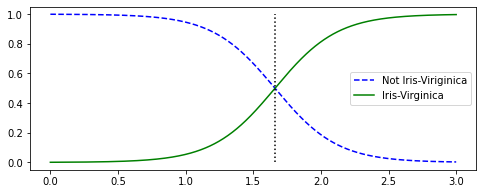

In [50]:
plt.figure(figsize=(8, 3))
plt.plot(X_new, predict_prob[:, 0], "b--", label="Not Iris-Viriginica") # virginica가 아닐 확률
plt.plot(X_new, predict_prob[:, 1], "g-", label="Iris-Virginica") # virginica 일 확률
plt.legend()

# decision boundary(결정경계)
decision_boundary = X_new[predict_prob[:, 1] > 0.5][0] # virginica로 최초로 예측하게 되는 petal width 의 길이, 1.66cm
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:")
print(decision_boundary)

In [54]:
log_reg.predict([[1.7]])  # 결정경계 1.66 보다 크므로 virginica(1)

array([1], dtype=int32)

In [55]:

log_reg.predict([[1.5]])  # 결정경계 1.66 보다 작으므로 virginica(0)

array([0], dtype=int32)